We'll be using GeoPandas to visualize the data we got from our datacollection step. Make sure to install <strong>GeoPandas, matplotlib, and contextily</strong> (for map basemap and auto map projection).

In [3]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as ctx

df = pd.read_csv("places.csv")
df

,displayName,rating,formattedAddress,id,latitude,longitude
0,Dilettante Mocha Café at Bellefield Office Park,4.4,"Bellefield Office Park, Conifer Building, 1450...",ChIJUaS2CnRskFQRgkVy8FFKcKE,47.597937,-122.187878
1,Polaris Restaurant,3.7,"11200 SE 6th St, Bellevue, WA 98004, USA",ChIJtToSvHpskFQR9plO2_RX048,47.605350,-122.189563
2,Rivue Bar and Grill,4.1,"605 114th Ave SE, Bellevue, WA 98004, USA",ChIJAy-pHnBskFQRYYC9N_vXHLo,47.603912,-122.186403
3,TRES Sandwich,4.7,"1502 145th Pl SE, Bellevue, WA 98007, USA",ChIJwTsohjxskFQRZTRFHsbBl1o,47.596983,-122.150127
4,Tokyo Stop Teriyaki,4.5,"1504 145th Pl SE, Bellevue, WA 98007, USA",ChIJy59LiTxskFQRDfTH40WrfvU,47.597028,-122.149850
...,...,...,...,...,...,...
187,Teapot Vegetarian House,4.2,"15230 NE 24th St Ste H, Redmond, WA 98052, USA",ChIJE4jaAAptkFQRCeka4cpRkOI,47.631927,-122.136660
188,Miah's Kitchen,4.0,"2022 148th Ave NE #13b, Redmond, WA 98052, USA",ChIJZ_AWgX93CEERlF5MCNVchOY,47.628200,-122.141278
189,Jimmy John's,3.5,"15253 NE Bel Red Rd, Bellevue, WA 98007, USA",ChIJDz_l5aZtkFQR0JxWrMJJlF8,47.628608,-122.135099
190,La Tía Angelina,4.5,"2444 NE Bel Red Rd, Redmond, WA 98052, USA",ChIJR4_zXR9tkFQRR7gn-iENrC8,47.631917,-122.132944


In [7]:
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.longitude, df.latitude),
    crs="EPSG:4326" # this is because 4326 is the default for GMaps
)

# convert to EPSG:3857 (Web Mercator) to plot over a basemap
gdf = gdf.to_crs(epsg=3857)

In [10]:
print(ctx.providers.keys())

dict_keys(['OpenStreetMap', 'MapTilesAPI', 'OpenSeaMap', 'OPNVKarte', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Stadia', 'Thunderforest', 'BaseMapDE', 'CyclOSM', 'Jawg', 'MapBox', 'MapTiler', 'TomTom', 'Esri', 'OpenWeatherMap', 'HERE', 'HEREv3', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'GeoportailFrance', 'OneMapSG', 'USGS', 'WaymarkedTrails', 'OpenAIP', 'OpenSnowMap', 'AzureMaps', 'SwissFederalGeoportal', 'TopPlusOpen', 'Gaode', 'Strava', 'OrdnanceSurvey', 'UN'])


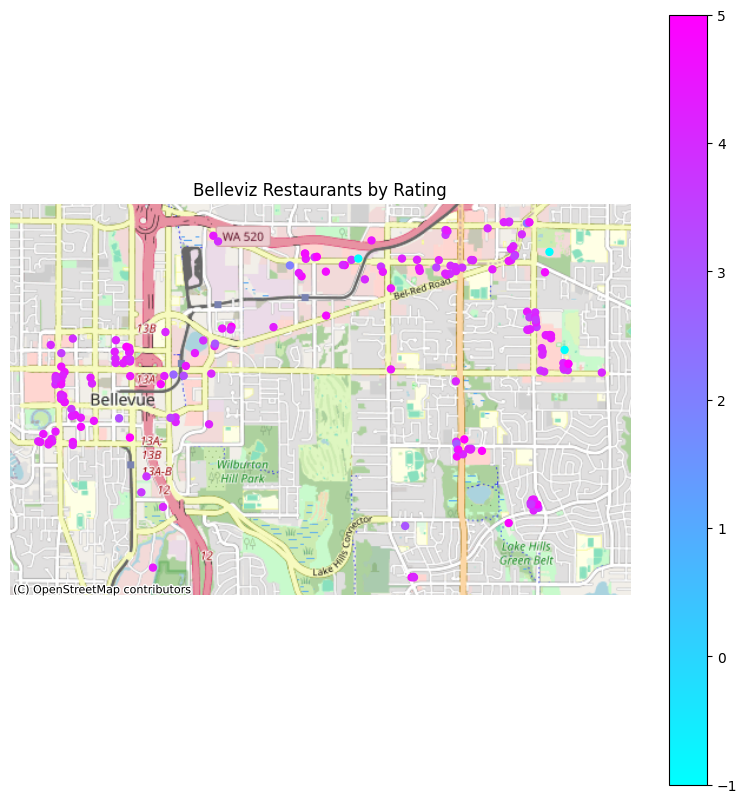

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, column="rating", cmap="cool", legend=True, markersize=25)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title("Belleviz Restaurants by Rating")
ax.set_axis_off()
plt.show()